# Assignment 4 ( Simple linear regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Q1

Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [2]:
df=pd.read_csv('delivery_time.csv')


In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Perform exploratory data analysis (EDA) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isnull().sum() # Check for missing values

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.corr() #Checking the Correlation between variables

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


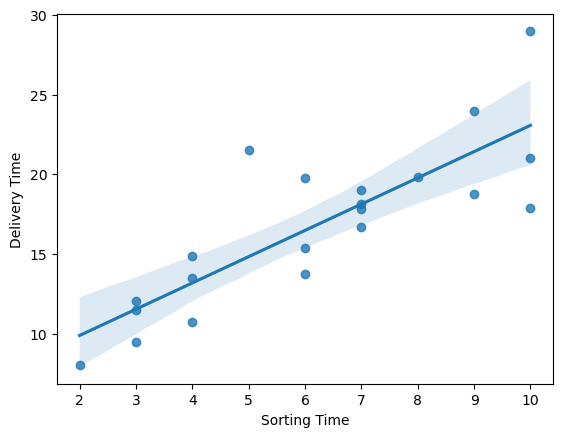

In [8]:
sns.regplot(x ='Sorting Time',y='Delivery Time',data=df)
plt.show()
#If the relationship is linear,
#we should see a roughly straight line in the plot that passes through the middle of the points
#sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
#The scatter plot also shows a positive linear relationship between sorting time and delivery time.

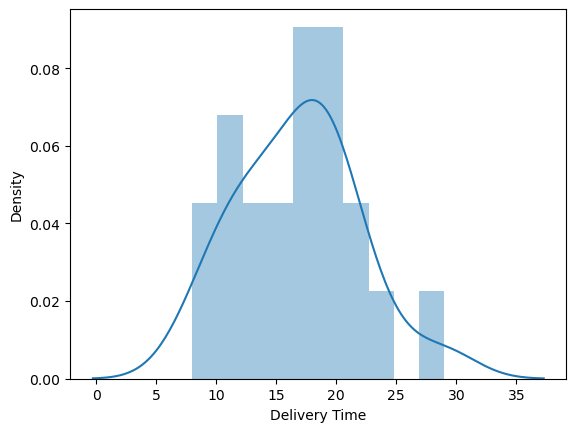

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

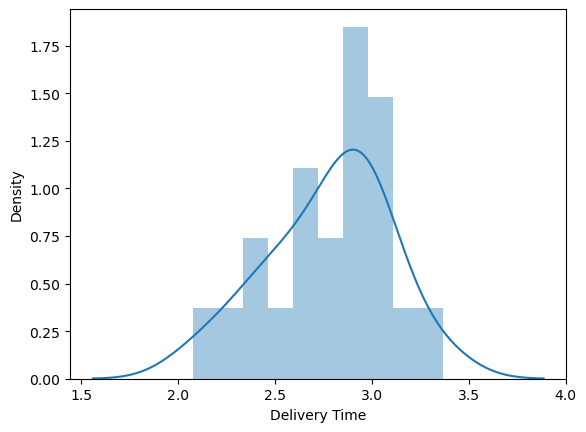

In [9]:
#The histogram of delivery time shows that the data is approximately normally distributed.

sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.show()
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)

#The natural logarithm is used because it compresses the range of values in a way
#that makes small variations more visible.

## Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

OLS regression is a statistical technique that assumes a linear relationship between the dependent and independent variables

In [10]:
df=df.rename(columns={'Delivery Time':'dt','Sorting Time':'st'})

In [11]:
model = smf.ols('dt~st', data = df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        14:57:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variable transformations

Cube transformation, log transformation, and square root transformation are all types of variable transformations 

used to make the data more normal or symmetric, and are typically applied to the dependent or independent variables

in order to improve the fit of the regression model.

*Lets Try some data transformation to check whether these scores can get any higher than this.

In [13]:
model1 = smf.ols('np.log(dt)~np.log(st)', data = df).fit()  #log transformation

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        14:57:53   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(st)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model2 = smf.ols('np.sqrt(dt)~np.sqrt(st)',data=df).fit()  #square root transformation

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.sqrt(dt)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        14:57:53   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(st)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model3 = smf.ols('np.cbrt(dt)~np.cbrt(st)',data=df).fit()    #cube transformation

In [18]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.cbrt(dt)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                        14:57:53   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(st)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model validation

In [19]:
#pred_y1=np.square(model1.predict(df1['Sorting_Time']))

In [20]:
model1.fittedvalues

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [21]:
df['predicted_dt']=model1.fittedvalues

In [22]:
df

,dt,st,predicted_dt
0,21.00,10,3.117833
1,13.50,4,2.570329
2,19.75,6,2.812603
3,24.00,9,3.054878
4,29.00,10,3.117833
5,15.35,6,2.812603
6,19.00,7,2.904712
7,9.50,3,2.398432
8,17.90,10,3.117833
9,18.75,9,3.054878


In [23]:
df['predicted_dt']

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
Name: predicted_dt, dtype: float64

In [24]:
predicted1 = pd.DataFrame() #
predicted1['st'] = df.st
predicted1['dt'] = df.dt
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model1.predict(predicted1.st)))
predicted1

,st,dt,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


We will use Model 1 as it has the best R square value

1 p-value < 0.01
Thus the model is accepted

2 coefficient = 1.74
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.74

3 Adj. R-sqared = 0.76
Thus the model explains 76.7% of the variance in dependent variable

In [25]:
predicted1 = pd.DataFrame() #2nd predicated
predicted1['st'] = df.st
predicted1['dt'] = df.dt
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model3.predict(predicted1.st))**3
predicted1                     

,st,dt,Predicted_Delivery_Time
0,10,21.00,22.793456
1,4,13.50,13.075096
2,6,19.75,16.583344
3,9,24.00,21.310577
4,10,29.00,22.793456
5,6,15.35,16.583344
6,7,19.00,18.214633
7,3,9.50,11.136114
8,10,17.90,22.793456
9,9,18.75,21.310577
